In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
training_df = pd.read_csv('C:/Users/nafla/OneDrive/Documents/system development/Netflix/training_data.csv')
training_df.head()

,MovieID,CustomerID,Rating,Date,YearOfRelease,RatingYear,MovieAge
0,1,1488844,3,2005-09-06,2003,2005,2
1,1,822109,5,2005-05-13,2003,2005,2
2,1,885013,4,2005-10-19,2003,2005,2
3,1,30878,4,2005-12-26,2003,2005,2
4,1,823519,3,2004-05-03,2003,2004,1


# EDA

In [4]:
training_df.describe()

,MovieID,CustomerID,Rating,YearOfRelease,RatingYear,MovieAge
count,2.405358e+07,2.405358e+07,2.405358e+07,2.405358e+07,2.405358e+07,2.405358e+07
mean,2.308308e+03,1.322286e+06,3.599639e+00,1.994406e+03,2.004264e+03,9.858772e+00
std,1.303901e+03,7.645780e+05,1.086117e+00,1.259927e+01,9.896143e-01,1.257810e+01
min,1.000000e+00,6.000000e+00,1.000000e+00,1.915000e+03,1.999000e+03,-3.000000e+00
25%,1.180000e+03,6.609295e+05,3.000000e+00,1.991000e+03,2.004000e+03,2.000000e+00
50%,2.342000e+03,1.318594e+06,4.000000e+00,1.999000e+03,2.005000e+03,5.000000e+00
75%,3.433000e+03,1.984358e+06,4.000000e+00,2.003000e+03,2.005000e+03,1.300000e+01
max,4.499000e+03,2.649429e+06,5.000000e+00,2.005000e+03,2.005000e+03,9.000000e+01


# 1.Ratings distribution per value, movie, customer and rating year

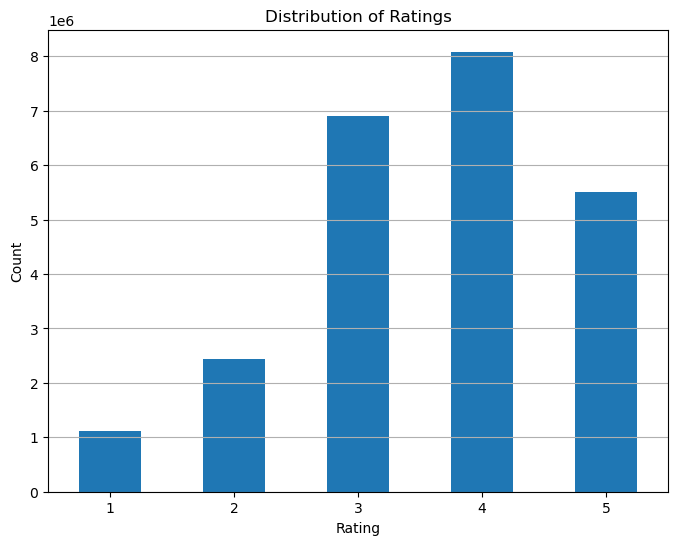

In [5]:
# Count of each rating
rating_counts = training_df['Rating'].value_counts().sort_index()

# Plotting the distribution of ratings
plt.figure(figsize=(8, 6))
rating_counts.plot(kind='bar')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

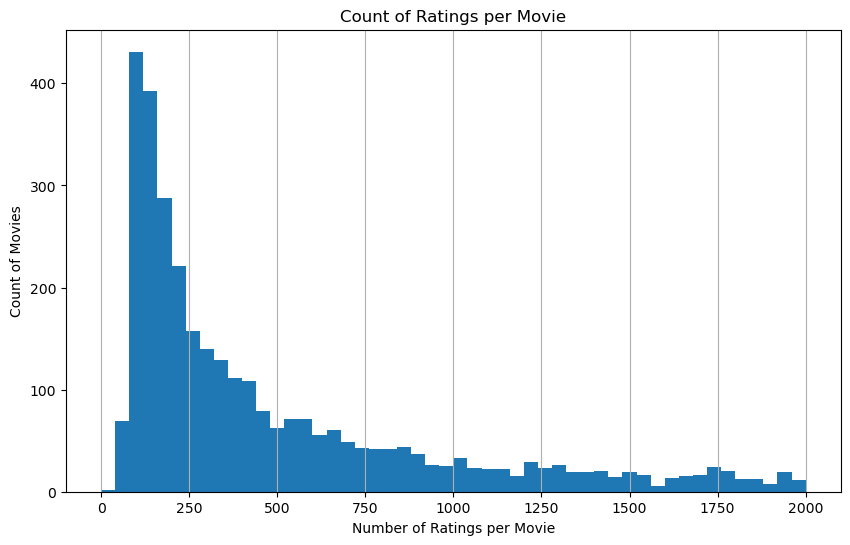

In [6]:
# Count of ratings per movie
ratings_per_movie = training_df['MovieID'].value_counts()

# Plotting the count of ratings per movie
plt.figure(figsize=(10, 6))
ratings_per_movie.hist(bins=50, range=(0, 2000))  # Adjust the range and bins as needed
plt.title('Count of Ratings per Movie')
plt.xlabel('Number of Ratings per Movie')
plt.ylabel('Count of Movies')
plt.grid(axis='y')
plt.show()

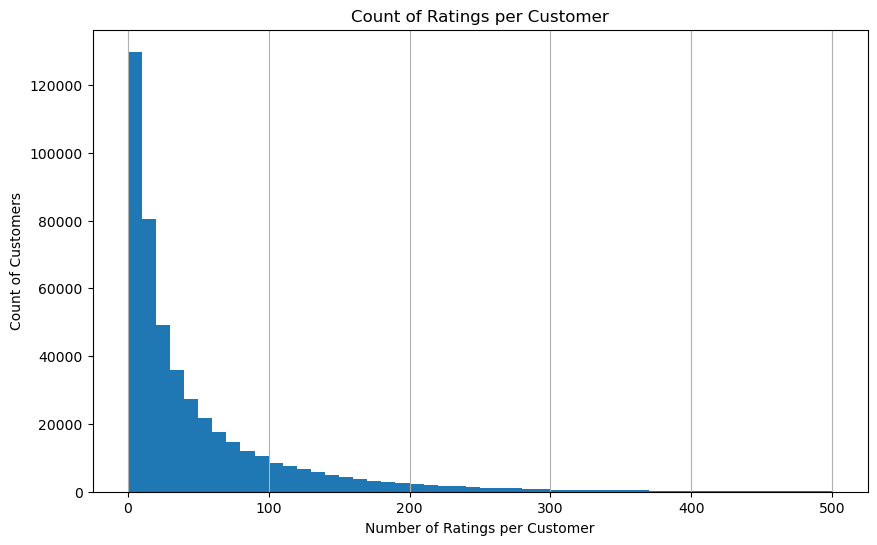

In [7]:
# Count of ratings per customer
ratings_per_customer = training_df['CustomerID'].value_counts()

# Plotting the count of ratings per customer
plt.figure(figsize=(10, 6))
ratings_per_customer.hist(bins=50, range=(0, 500))  # Adjust the range and bins as needed
plt.title('Count of Ratings per Customer')
plt.xlabel('Number of Ratings per Customer')
plt.ylabel('Count of Customers')
plt.grid(axis='y')
plt.show()

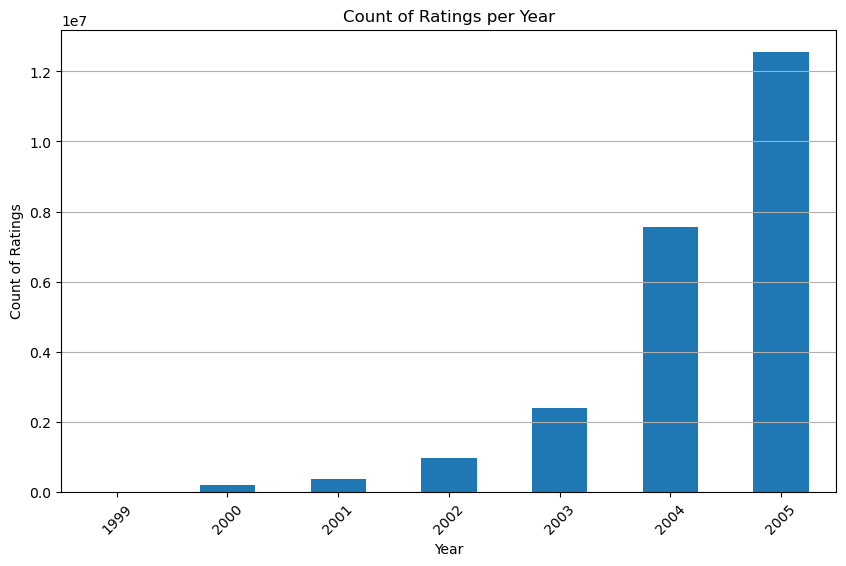

In [8]:
# Count of ratings per year
ratings_per_year = training_df['RatingYear'].value_counts().sort_index()

# Plotting the count of ratings per year
plt.figure(figsize=(10, 6))
ratings_per_year.plot(kind='bar')
plt.title('Count of Ratings per Year')
plt.xlabel('Year')
plt.ylabel('Count of Ratings')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 2. Average of ratings per year and movies

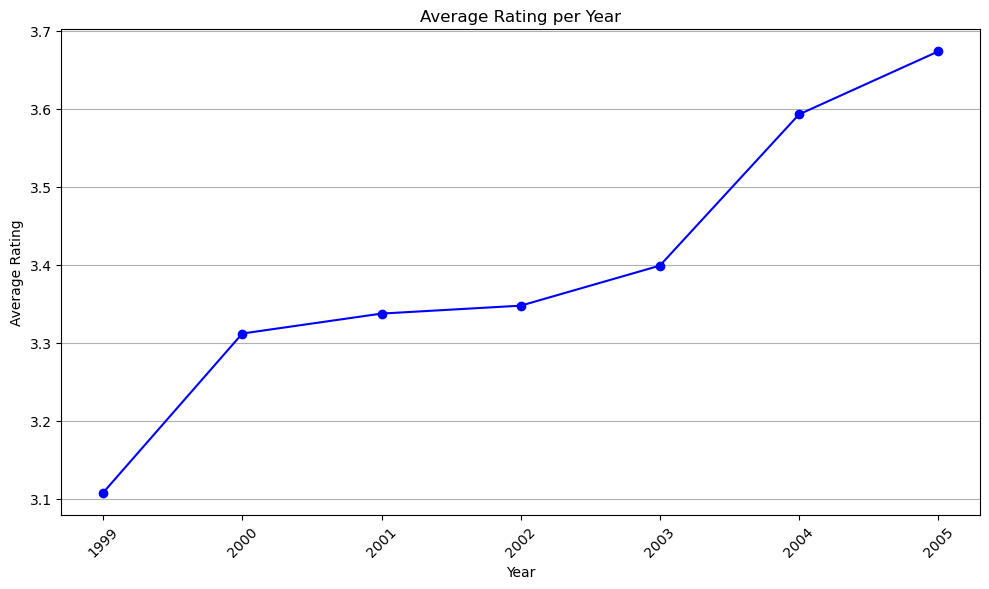

In [9]:
# Calculate the average rating per year
average_rating_per_year = training_df.groupby('RatingYear')['Rating'].mean()

# Plotting the average rating per year
plt.figure(figsize=(10, 6))
average_rating_per_year.plot(kind='line', marker='o', linestyle='-', color='b')
plt.title('Average Rating per Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjusts subplot params to give some padding
plt.show()

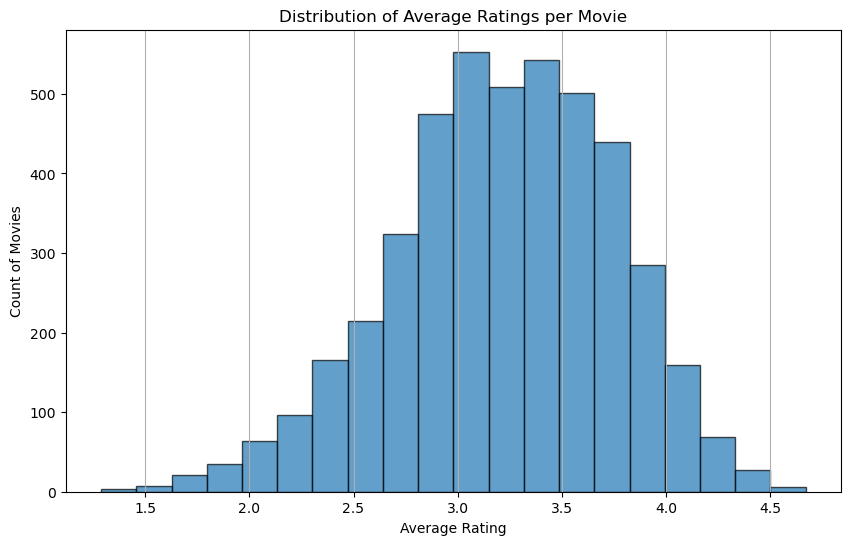

In [10]:
# Calculate the average rating for each movie
average_rating_per_movie = training_df.groupby('MovieID')['Rating'].mean()

# Plotting the distribution of average ratings per movie
plt.figure(figsize=(10, 6))
average_rating_per_movie.hist(bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Average Ratings per Movie')
plt.xlabel('Average Rating')
plt.ylabel('Count of Movies')
plt.grid(axis='y')
plt.show()

# Year of Release Analysis

Movies Released per Year: Ploting the number of movies released each year to see how production trends have changed over time.

Average Rating by Year of Release: Analyzing if movies from certain years tend to receive higher ratings, indicating periods of higher (or lower) movie quality.

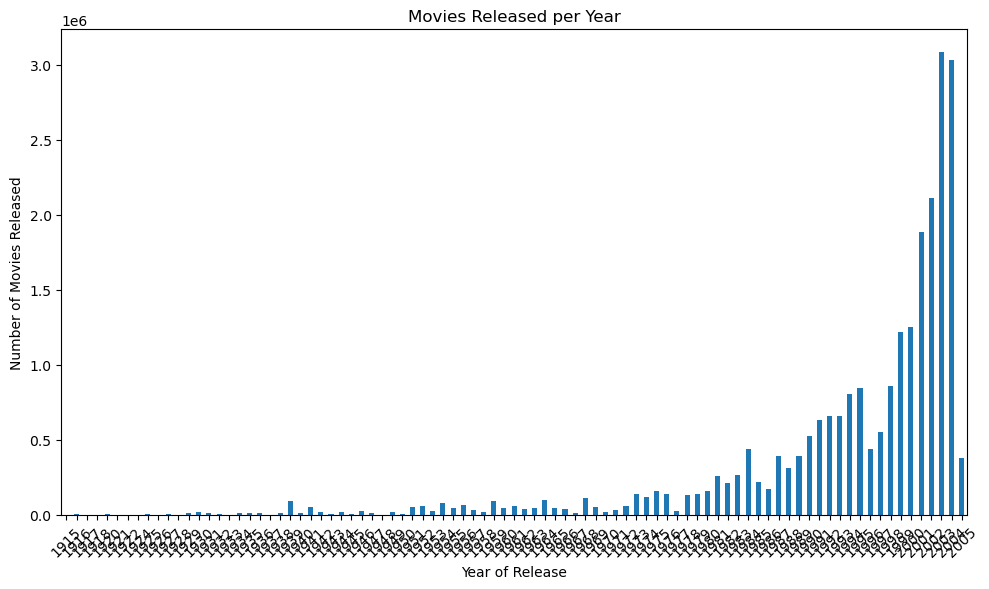

In [11]:
# Counting movies released per year
movies_released_per_year = training_df['YearOfRelease'].value_counts().sort_index()

# Plotting the number of movies released each year
plt.figure(figsize=(10, 6))
movies_released_per_year.plot(kind='bar')
plt.title('Movies Released per Year')
plt.xlabel('Year of Release')
plt.ylabel('Number of Movies Released')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

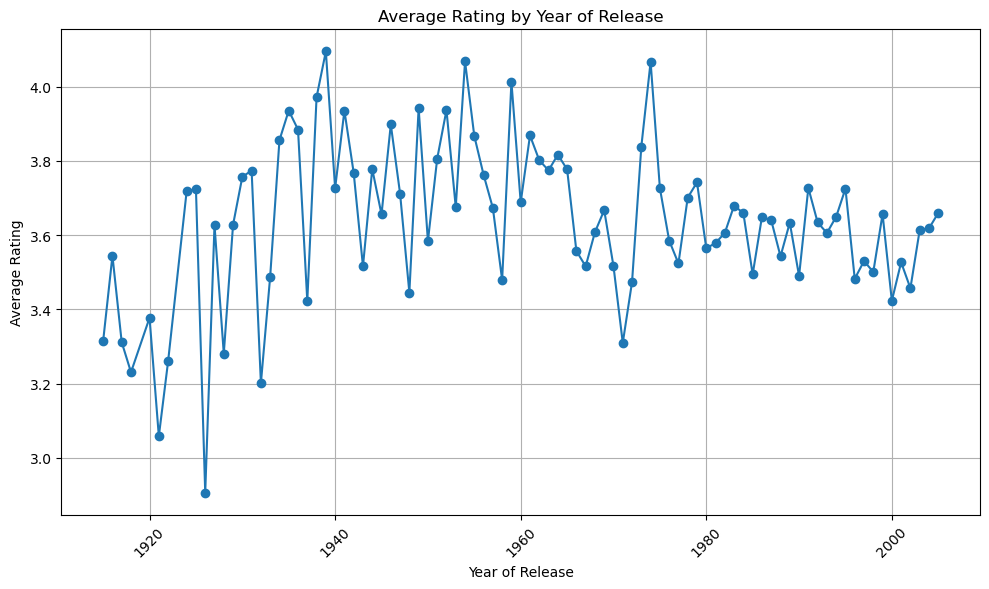

In [12]:
# Calculate the average rating by year of release
average_rating_by_year_of_release = training_df.groupby('YearOfRelease')['Rating'].mean()

# Plotting the average rating by year of release
plt.figure(figsize=(10, 6))
average_rating_by_year_of_release.plot(kind='line', marker='o', linestyle='-')
plt.title('Average Rating by Year of Release')
plt.xlabel('Year of Release')
plt.ylabel('Average Rating')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

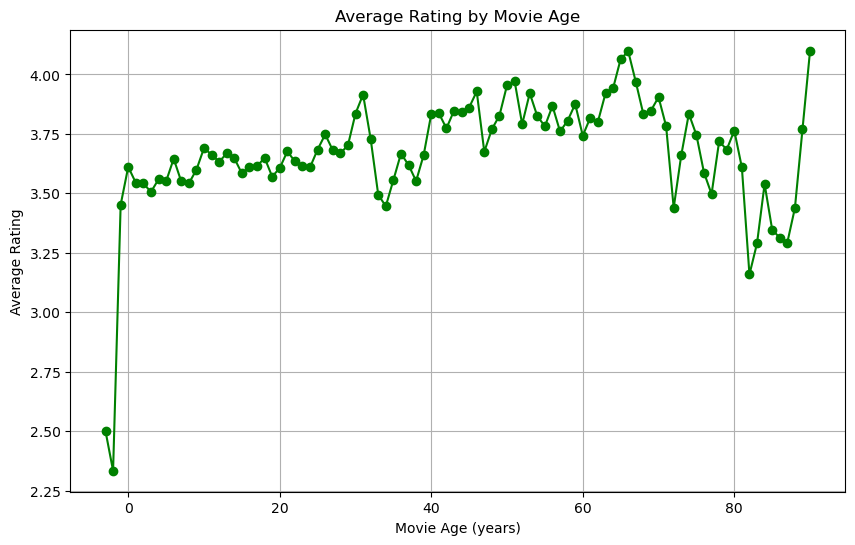

In [14]:
import pandas as pd

# Calculate the average rating for each movie age
average_rating_by_movie_age = training_df.groupby('MovieAge')['Rating'].mean()

plt.figure(figsize=(10, 6))
average_rating_by_movie_age.plot(kind='line', marker='o', linestyle='-', color='green')
plt.title('Average Rating by Movie Age')
plt.xlabel('Movie Age (years)')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

test